In [2]:
!pip install mediapipe

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.7/35.7 MB 37.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 22.3 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-metadata 1.15.0 requires protobuf<4.21,>=3.20.3; python_version < "3.11", but you have protobuf 4.25.3 which is incompatible.


In [4]:
import mediapipe as mp
import cv2

mp_hands = mp.solutions.hands
hands = mp_hands.Hands()

def detect_hands(image):
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    results = hands.process(image_rgb)

    hand_boxes = []
    if results.multi_hand_landmarks:
        for hand_landmarks in results.multi_hand_landmarks:
            x_coords = [landmark.x for landmark in hand_landmarks.landmark]
            y_coords = [landmark.y for landmark in hand_landmarks.landmark]
            x_min, x_max = min(x_coords), max(x_coords)
            y_min, y_max = min(y_coords), max(y_coords)
            hand_boxes.append([int(x_min * image.shape[1]), int(y_min * image.shape[0]),
                               int(x_max * image.shape[1]), int(y_max * image.shape[0])])

    return hand_boxes


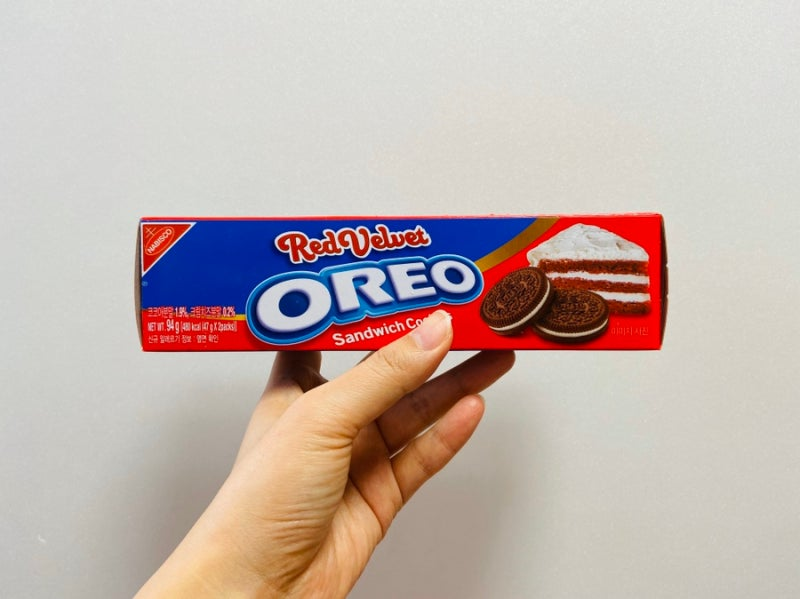

In [15]:
from google.colab.patches import cv2_imshow
image_path = "/content/drive/MyDrive/Colab Notebooks/colab/test_images/oreored.jpg"  # 여기에 이미지 경로를 넣으십시오.
image = cv2.imread(image_path)

# 손 감지
hand_boxes = detect_hands(image)

# 감지된 손에 바운딩 박스 그리기
for box in hand_boxes:
    x_min, y_min, x_max, y_max = box
    cv2.rectangle(image, (x_min, y_min), (x_max, y_max), (0, 255, 0), 2)

# 결과 이미지 출력
cv2_imshow(image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [14]:
import os
import cv2
import mediapipe as mp
from google.colab.patches import cv2_imshow

mp_hands = mp.solutions.hands
hands = mp_hands.Hands()

def detect_hands(image):
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    results = hands.process(image_rgb)

    hand_boxes = []
    if results.multi_hand_landmarks:
        for hand_landmarks in results.multi_hand_landmarks:
            x_coords = [landmark.x for landmark in hand_landmarks.landmark]
            y_coords = [landmark.y for landmark in hand_landmarks.landmark]
            x_min, x_max = min(x_coords), max(x_coords)
            y_min, y_max = min(y_coords), max(y_coords)
            hand_boxes.append([int(x_min * image.shape[1]), int(y_min * image.shape[0]),
                               int(x_max * image.shape[1]), int(y_max * image.shape[0])])

    return hand_boxes

# 이미지가 있는 폴더 경로
folder_path = '/content/drive/MyDrive/Colab Notebooks/colab/test_images'  # 여기에 폴더 경로를 넣으십시오.

# 폴더 내의 모든 파일 확인
for filename in os.listdir(folder_path):
    if filename.endswith(('.jpg', '.jpeg', '.png', '.bmp')):  # 이미지 파일인 경우에만 처리
        image_path = os.path.join(folder_path, filename)

        # 이미지 읽기
        image = cv2.imread(image_path)

        # 손 감지
        hand_boxes = detect_hands(image)

        # 감지된 손에 바운딩 박스 그리기
        for box in hand_boxes:
            x_min, y_min, x_max, y_max = box
            cv2.rectangle(image, (x_min, y_min), (x_max, y_max), (0, 255, 0), 2)

        # 결과 이미지 출력
        cv2_imshow(image)
        cv2.waitKey(0)

cv2.destroyAllWindows()


Output hidden; open in https://colab.research.google.com to view.

In [23]:
import cv2
import mediapipe as mp
import math

# 이미지 파일 경로
image_path = '/content/drive/MyDrive/Colab Notebooks/colab/test_images/hand.jpg'

# MediaPipe Hands 설정
mpHands = mp.solutions.hands
my_hands = mpHands.Hands(static_image_mode=True, max_num_hands=1)
mpDraw = mp.solutions.drawing_utils

def dist(x1, y1, x2, y2):
    return math.sqrt((x1 - x2) ** 2 + (y1 - y2) ** 2)

# 순서대로 검지 - 중지 - 약지 - 소지
# 엄지는 인식 안하게끔 했어요
compareIndex = [[6, 8], [10, 12], [14, 16], [18, 20]]
open = [False, False, False, False]

# 손가락 4개 접혀있을때 grap 뜨게 하기
gesture = [
    [False, False, False, False, "Grap"]
]

# 이미지 읽기
img = cv2.imread(image_path)
h, w, c = img.shape
imgRGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
results = my_hands.process(imgRGB)

if results.multi_hand_landmarks:
    for handLms in results.multi_hand_landmarks:
        for i in range(0, 4):
            open[i] = dist(handLms.landmark[0].x, handLms.landmark[0].y,
                           handLms.landmark[compareIndex[i][0]].x, handLms.landmark[compareIndex[i][0]].y) < \
                      dist(handLms.landmark[0].x, handLms.landmark[0].y,
                           handLms.landmark[compareIndex[i][1]].x, handLms.landmark[compareIndex[i][1]].y)
        print(open)
        test_x = handLms.landmark[0].x * w
        test_y = handLms.landmark[0].y * h
        for i in range(len(gesture)):
            flag = True
            for j in range(0, 4):
                if gesture[i][j] != open[j]:
                    flag = False
            if flag:
                cv2.putText(img, gesture[i][4], (round(test_x) - 50, round(test_y) - 250),
                            cv2.FONT_HERSHEY_PLAIN, 4, (0, 0, 0), 4)
        mpDraw.draw_landmarks(img, handLms, mpHands.HAND_CONNECTIONS)

# 결과 이미지 보기
cv2_imshow(cv2.flip(img, 1))
cv2.waitKey(0)
cv2.destroyAllWindows()


Output hidden; open in https://colab.research.google.com to view.

In [25]:
import cv2
import mediapipe as mp
import math

# 이미지 파일 경로
image_path = "/content/drive/MyDrive/Colab Notebooks/colab/test_images/hand.jpg"

# MediaPipe Hands 설정
mpHands = mp.solutions.hands
my_hands = mpHands.Hands(static_image_mode=True, max_num_hands=1)
mpDraw = mp.solutions.drawing_utils

def dist(x1, y1, x2, y2):
    return math.sqrt((x1 - x2) ** 2 + (y1 - y2) ** 2)

# 순서대로 검지 - 중지 - 약지 - 소지
# 엄지는 인식 안하게끔 했어요
compareIndex = [[6, 8], [10, 12], [14, 16], [18, 20]]
open = [False, False, False, False]

# 손가락 4개 접혀있을때 grap 뜨게 하기
gesture = [
    [False, False, False, False, "Grap"]
]

# 이미지 읽기
img = cv2.imread(image_path)
h, w, c = img.shape
imgRGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
results = my_hands.process(imgRGB)

if results.multi_hand_landmarks:
    for handLms in results.multi_hand_landmarks:
        # 바운딩 박스 좌표 초기화
        x_min, y_min = w, h
        x_max, y_max = 0, 0

        for lm in handLms.landmark:
            x, y = int(lm.x * w), int(lm.y * h)
            x_min = min(x_min, x)
            y_min = min(y_min, y)
            x_max = max(x_max, x)
            y_max = max(y_max, y)

        # 바운딩 박스 그리기
        cv2.rectangle(img, (x_min, y_min), (x_max, y_max), (0, 255, 0), 2)

        for i in range(0, 4):
            open[i] = dist(handLms.landmark[0].x, handLms.landmark[0].y,
                           handLms.landmark[compareIndex[i][0]].x, handLms.landmark[compareIndex[i][0]].y) < \
                      dist(handLms.landmark[0].x, handLms.landmark[0].y,
                           handLms.landmark[compareIndex[i][1]].x, handLms.landmark[compareIndex[i][1]].y)
        print(open)
        test_x = handLms.landmark[0].x * w
        test_y = handLms.landmark[0].y * h
        for i in range(len(gesture)):
            flag = True
            for j in range(0, 4):
                if gesture[i][j] != open[j]:
                    flag = False
            if flag:
                cv2.putText(img, gesture[i][4], (round(test_x) - 50, round(test_y) - 250),
                            cv2.FONT_HERSHEY_PLAIN, 4, (0, 0, 0), 4)
        mpDraw.draw_landmarks(img, handLms, mpHands.HAND_CONNECTIONS)

# 결과 이미지 보기
cv2_imshow(cv2.flip(img, 1))
cv2.waitKey(0)
cv2.destroyAllWindows()
